### data preparation

In [1]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

In [2]:
test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

In [3]:
train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)

In [4]:
#data observation
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))

In [5]:
#check the data by calling below function
#data_obs()

#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sb.countplot(x='Label', data=dataFile, palette='hls')

<AxesSubplot:xlabel='Label', ylabel='count'>

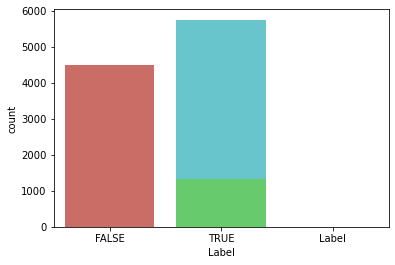

In [6]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)


In [7]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()

In [8]:
#run the below function call to see the quality check results
#data_qualityCheck()



#eng_stemmer = SnowballStemmer('english')
#stopwords = set(nltk.corpus.stopwords.words('english'))

#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed

In [9]:
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [10]:
"""
#trigrams
def create_trigrams(words):
    assert type(words) == list
    skip == 0
    join_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,skip+2):
            for k1 in range(1, skip+2):
                for k2 in range(1,skip+2):
                    for i+k1 < Len and i+k1+k2 < Len:
                        lst.append(join_str.join([words[i], words[i+k1],words[i+k1+k2])])
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst
"""

'\n#trigrams\ndef create_trigrams(words):\n    assert type(words) == list\n    skip == 0\n    join_str = " "\n    Len = len(words)\n    if L > 2:\n        lst = []\n        for i in range(1,skip+2):\n            for k1 in range(1, skip+2):\n                for k2 in range(1,skip+2):\n                    for i+k1 < Len and i+k1+k2 < Len:\n                        lst.append(join_str.join([words[i], words[i+k1],words[i+k1+k2])])\n        else:\n            #set is as bigram\n            lst = create_bigram(words)\n    return lst\n'

In [11]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

#doc = ['runners like running and thus they run','this is a test for tokens']
#tokenizer([word for line in test_news.iloc[:,1] for word in line.lower().split()])

#show the distribution of labels in the train and test data

In [12]:
"""def create_datafile(filename)
    #function to slice the dataframe to keep variables necessary to be used for classification
    return "return df to be used"
"""
    
"""#converting multiclass labels present in our datasets to binary class labels
for i , row in data_TrainNews.iterrows():
    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):
        data_TrainNews.iloc[:,0] = "true"
    else :
        data_TrainNews.iloc[:,0] = "false"
        
for i,row in data_TrainNews.iterrows():
    print(row)
"""

'#converting multiclass labels present in our datasets to binary class labels\nfor i , row in data_TrainNews.iterrows():\n    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):\n        data_TrainNews.iloc[:,0] = "true"\n    else :\n        data_TrainNews.iloc[:,0] = "false"\n        \nfor i,row in data_TrainNews.iterrows():\n    print(row)\n'

### feature selection

In [13]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


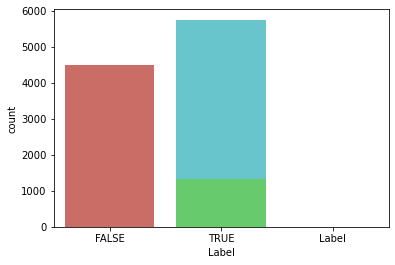

In [14]:
import DataPrep
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [15]:
#we will start with simple bag of words technique 
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(DataPrep.train_news['Statement'].values)

print(countV)
print(train_count)

CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1


In [16]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

In [17]:
#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])

In [18]:
#bag of words - with n-grams
#countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
#tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [19]:
import nltk

In [20]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [21]:
#POS Tagging
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = DataPrep.train_news['Statement']
 
print(training_sentences)

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object


In [22]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }
    

In [23]:
#helper function to strip tags from tagged corpus	
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [24]:
#Using Word2Vec 
with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}

In [25]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [26]:
"""
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

"""

"\nclass TfidfEmbeddingVectorizer(object):\n    def __init__(self, word2vec):\n        self.word2vec = word2vec\n        self.word2weight = None\n        self.dim = len(word2vec.itervalues().next())\n\n    def fit(self, X, y):\n        tfidf = TfidfVectorizer(analyzer=lambda x: x)\n        tfidf.fit(X)\n        # if a word was never seen - it must be at least as infrequent\n        # as any of the known words - so the default idf is the max of \n        # known idf's\n        max_idf = max(tfidf.idf_)\n        self.word2weight = defaultdict(\n            lambda: max_idf,\n            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])\n\n        return self\n\n    def transform(self, X):\n        return np.array([\n                np.mean([self.word2vec[w] * self.word2weight[w]\n                         for w in words if w in self.word2vec] or\n                        [np.zeros(self.dim)], axis=0)\n                for words in X\n            ])\n\n"

### classifier

In [27]:
import DataPrep
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1
0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with Joh

In [28]:
#string to test
doc_new = ['obama is running for president in 2016']

In [29]:
#the feature selection has been done in FeatureSelection.py module. here we will create models using those features for prediction

#first we will use bag of words techniques

#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',FeatureSelection.countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb = nb_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb == DataPrep.test_news['Label'])

0.6072128577028616

In [30]:
#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR = logR_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR == DataPrep.test_news['Label'])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6013328106624853

In [31]:
#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',FeatureSelection.countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm = svm_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm == DataPrep.test_news['Label'])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5723245785966288

In [32]:
#using SVM Stochastic Gradient Descent on hinge loss
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

sgd_pipeline = Pipeline([
        ('svm2CV', CountVectorizer()),
        ('svm2_clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=5))
])

sgd_pipeline.fit(DataPrep.train_news['Statement'], DataPrep.train_news['Label'])
predicted_sgd = sgd_pipeline.predict(DataPrep.test_news['Statement'])
accuracy = np.mean(predicted_sgd == DataPrep.test_news['Label'])
print("Accuracy:", accuracy)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 0.6138769110152881


In [33]:
#random forest
random_forest = Pipeline([
        ('rfCV',FeatureSelection.countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf = random_forest.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf == DataPrep.test_news['Label'])

0.6217169737357899

In [34]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(DataPrep.train_news):
        train_text = DataPrep.train_news.iloc[train_ind]['Statement'] 
        train_y = DataPrep.train_news.iloc[train_ind]['Label']
    
        test_text = DataPrep.train_news.iloc[test_ind]['Statement']
        test_y = DataPrep.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(DataPrep.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [35]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Total statements classified: 10240
Score: 0.6465528860767489
score length 5
Confusion matrix:
[[2254 2234]
 [1937 3815]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

Total statements classified: 10240
Score: 0.6543305148056067
score length 5
Confusion matrix:
[[2175 2313]
 [1823 3929]]
Total statements classified: 10240
Score: 0.7004960214362899
score length 5
Confusion matrix:
[[1778 2710]
 [1190 4562]]


(None, None, None, None, None)

In [36]:
#========================================================================================
#n-grams & tfidf confusion matrix and F1 scores

#Naive bayes
# [841 3647]
# [427 5325]
# f1-Score: 0.723262051071

#Logistic regression
# [1617 2871]
# [1097 4655]
# f1-Score: 0.70113000531

#svm
# [2016 2472]
# [1524 4228]
# f1-Score: 0.67909201429

#sgdclassifier
# [  10 4478]
# [  13 5739]
# f1-Score: 0.718731637053

#random forest
# [1979 2509]
# [1630 4122]
# f1-Score: 0.665720333284
#=========================================================================================